In [13]:
import numpy as np
import pandas as pd

df = pd.read_csv(r'C:\Users\Arulprakash_palanive\Desktop\Credit Card Customer Data.csv', index_col='Sl_No')

df.head()


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
1,87073,100000,2,1,1,0
2,38414,50000,3,0,10,9
3,17341,50000,7,1,3,4
4,40496,30000,5,1,1,4
5,47437,100000,6,0,12,3


Since clustering methods use distance metrics I will create a scaled copy of the data.

In [17]:
from sklearn.preprocessing import StandardScaler

df_scaled = df.copy()
df_scaled[:] = StandardScaler().fit_transform(df_scaled)
df_scaled.drop('Customer Key', axis=1, inplace=True)
cols = list(df_scaled.columns)
df_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,
1,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
2,0.410293,-0.787585,-1.473731,2.520519,1.891859
3,0.410293,1.058973,-0.860451,0.134290,0.145528
4,-0.121665,0.135694,-0.860451,-0.547490,0.145528
5,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [18]:
df.shape

(660, 6)

In [19]:
df.isnull().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [20]:
gb_df = df.groupby('Customer Key').count()
print('There are',gb_df.loc[gb_df.Total_calls_made >=2].shape[1], 'duplicate entries for Customer Key')

for k in list(gb_df.loc[gb_df.Total_calls_made >=2].index):
    display(df.loc[df['Customer Key'] == k])

There are 5 duplicate entries for Customer Key


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
49,37252,6000,4,0,2,8
433,37252,59000,6,2,1,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
5,47437,100000,6,0,12,3
333,47437,17000,7,3,1,0


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
412,50706,44000,4,5,0,2
542,50706,60000,7,5,2,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
392,96929,13000,4,5,0,0
399,96929,67000,6,2,2,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
105,97935,17000,2,1,2,10
633,97935,187000,7,1,7,0


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Average credit limit:
The majority of records do not have credit or have a low limit. 

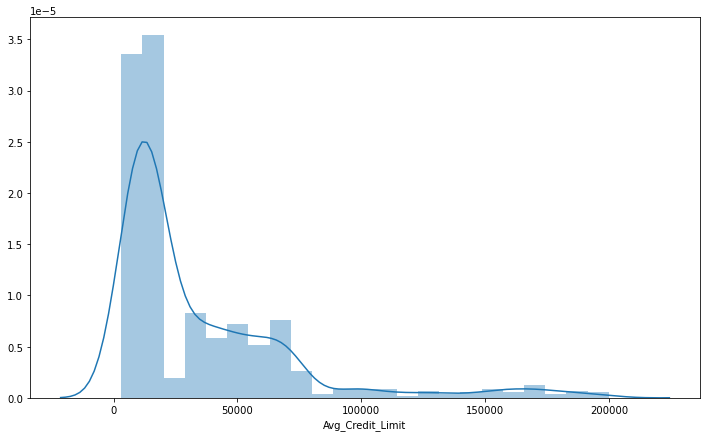

In [23]:
plt.figure(figsize=(12,7))
sns.distplot(df.Avg_Credit_Limit);

### Total credit cards:
Looks to be normally distributed. I can't help but wonder, why do some many users have more than one credit card? 


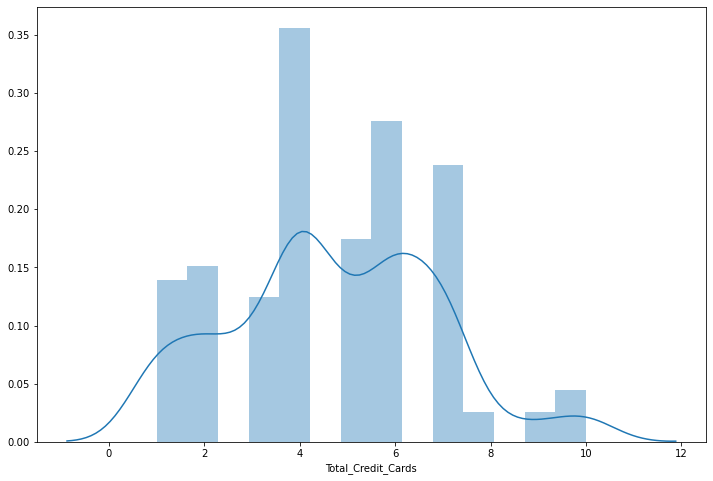

In [25]:
plt.figure(figsize=(12,8))
sns.distplot(df.Total_Credit_Cards);

### Total bank visits:
Once again, normally distributed variable. 


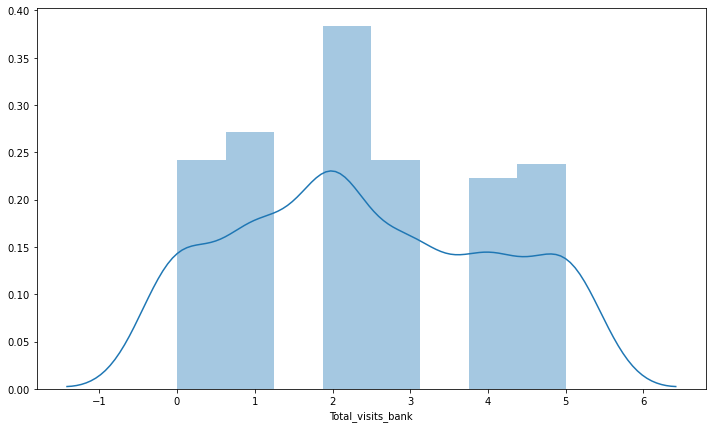

In [26]:
plt.figure(figsize=(12,7))
sns.distplot(df.Total_visits_bank);

### Total calls made:
The total number of calls made by the customer.
 


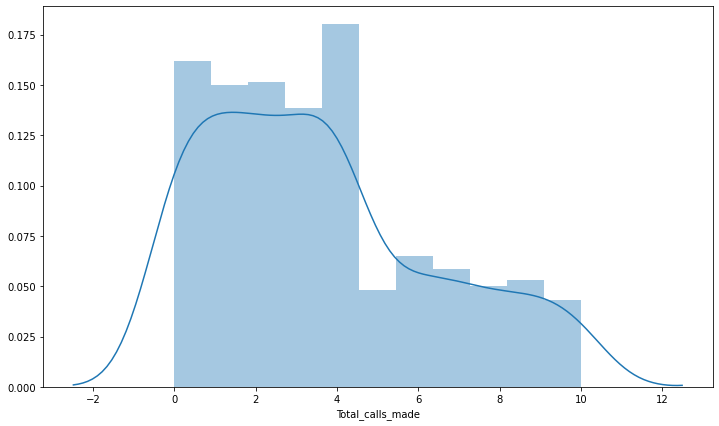

In [27]:
plt.figure(figsize=(12,7))
sns.distplot(df.Total_calls_made);

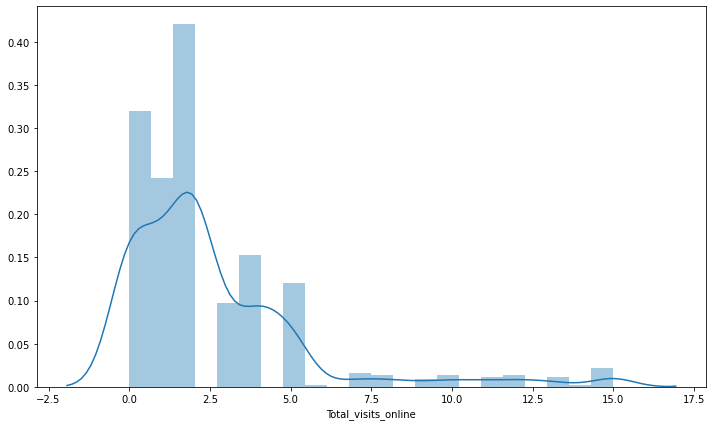

In [28]:
plt.figure(figsize=(12,7))
sns.distplot(df.Total_visits_online);

The two bivariate plots below are useful to see what amount of feature interaction is present.

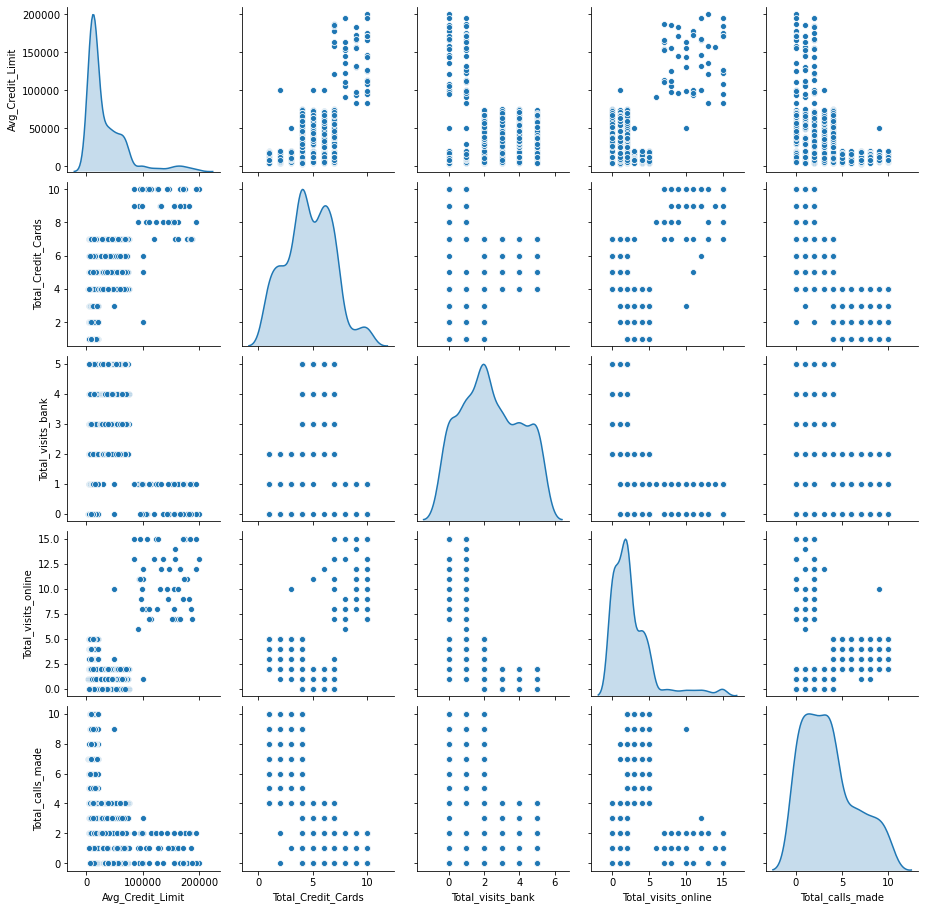

In [29]:
sns.pairplot(df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']], diag_kind='kde');

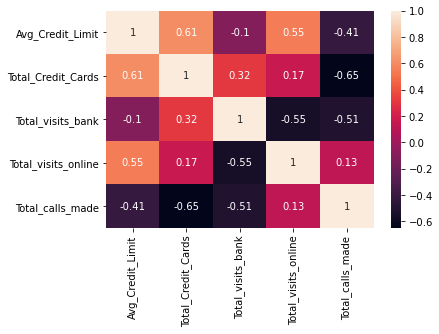

In [30]:
sns.heatmap(df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']].corr(), annot=True);

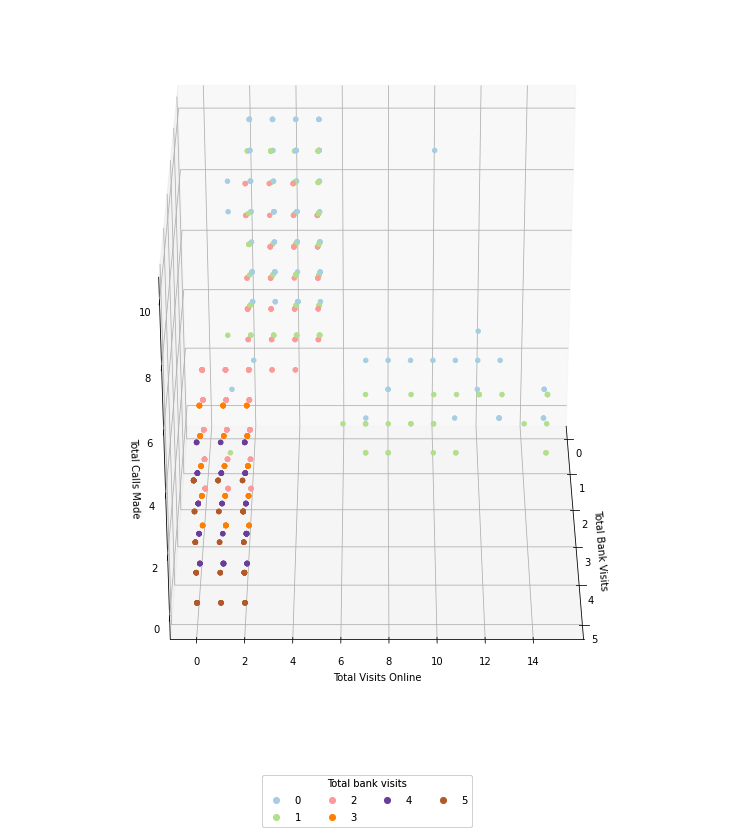

In [31]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure(figsize=(10,10))

ax = Axes3D(fig)



x = df.Total_visits_bank
y = df.Total_visits_online
z = df.Total_calls_made


g = ax.scatter(x, y, z, c=x, marker='o', depthshade=False, cmap='Paired')
ax.set_xlabel('Total Bank Visits')
ax.set_ylabel('Total Visits Online')
ax.set_zlabel('Total Calls Made')

# produce a legend with the unique colors from the scatter
legend = ax.legend(*g.legend_elements(), loc="lower center", title="Total bank visits", borderaxespad=-10, ncol=4)
ax.add_artist(legend)

# plt.show()

from matplotlib import animation

def rotate(angle):
     ax.view_init(azim=angle)

angle = 1
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=1)
ani.save('Cluster_plot.gif', writer=animation.PillowWriter(fps=25));

![SegmentLocal](./Cluster_plot.gif "segment")

In [ ]:
Part Two: K-means

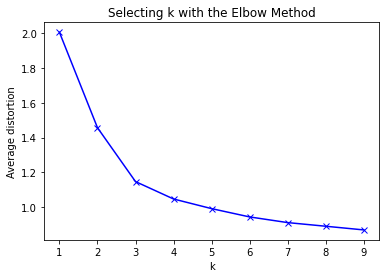

In [33]:
from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist
meanDistortions=[]

for k in range(1, 10):
    model=KMeans(n_clusters=k)
    model.fit(df_scaled)
    prediction=model.predict(df_scaled)
    meanDistortions.append(sum(np.min(cdist(df_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])


plt.plot(range(1, 10), meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method');

In [34]:
model = KMeans(n_clusters=3)
model.fit(df_scaled)
preds = model.predict(df_scaled)


In [35]:
from sklearn.metrics import silhouette_score
labels = model.labels_
silhouette_score(df_scaled, labels, metric='euclidean')

0.5157182558881063

In [36]:
df['Kmean_grouping'] = preds #here we add the predictions to the unscaled data so that we can gain some real world interpretability.
df_scaled['Kmean_grouping'] = preds

df.groupby('Kmean_grouping').count()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Kmean_grouping,,,,,,
0,224,224,224,224,224,224
1,386,386,386,386,386,386
2,50,50,50,50,50,50


In [37]:
_ = df.groupby('Kmean_grouping').mean().append(pd.DataFrame(df.std()).T)
_.index = ['Phone', 'Online', 'In person', 'Mean']
_

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping
Phone,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536,NaN
Online,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000,NaN
In person,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,NaN
Mean,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317,0.588364


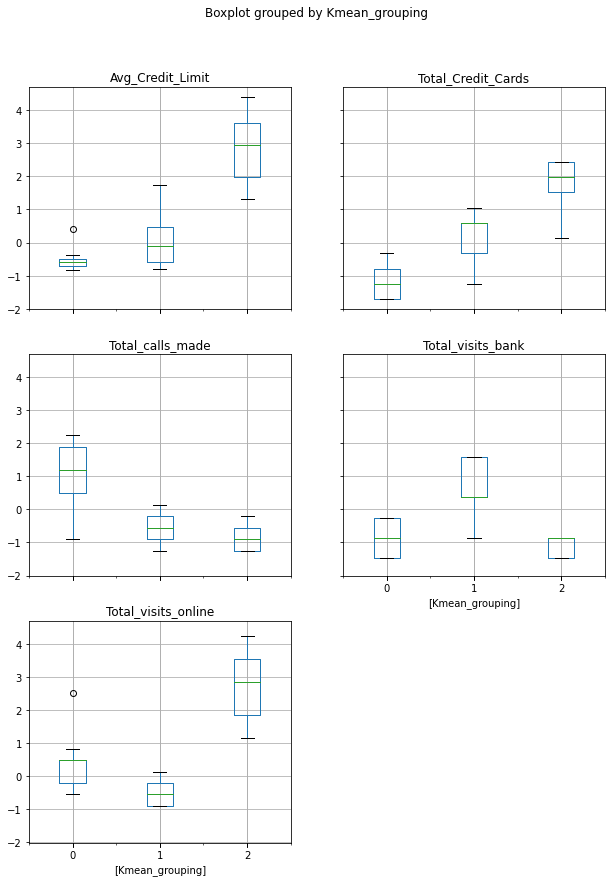

In [38]:
df_scaled.boxplot(by='Kmean_grouping', layout=(3,2), figsize=(10,14));

In [39]:
df_scaled.drop('Kmean_grouping', inplace=True, axis=1)

Part Three: Hierarchical Clustering



In [42]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

links = ['ward', 'complete', 'average', 'single', 'weighted', 'centroid', 'median']
affs = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation',
        'cosine', 'dice', 'euclidean', 'hamming', 'jaccard',
        'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto',
        'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean']

for aff in affs:
    for link in links:
        if link == 'ward' and aff != 'euclidean':
            pass
        elif link == 'centroid' and aff != 'euclidean':
            pass
        elif link == 'median' and aff != 'euclidean':
            pass
        else:
            Z = linkage(df_scaled[cols], metric=aff, method=link)
            c, coph_dists = cophenet(Z , pdist(df_scaled[cols]))
            if c > .75:
                print('affinity:',aff, ', link:',link,':', c)

affinity: braycurtis , link: single : 0.8502845518924395
affinity: canberra , link: single : 0.7566178713003985
affinity: chebyshev , link: complete : 0.8533474836336782
affinity: chebyshev , link: average : 0.8974159511838106
affinity: chebyshev , link: weighted : 0.8913624010768603
affinity: cityblock , link: complete : 0.8731477899179829
affinity: cityblock , link: average : 0.896329431104133
affinity: cityblock , link: weighted : 0.8825520731498188


C:\Users\Arulprakash_palanive\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:1695: RuntimeWarning: invalid value encountered in double_scalars
  c = numerator.sum() / np.sqrt((denomA.sum() * denomB.sum()))


affinity: euclidean , link: complete : 0.8599730607972423
affinity: euclidean , link: average : 0.8977080867389372
affinity: euclidean , link: weighted : 0.8861746814895477
affinity: euclidean , link: centroid : 0.8939385846326323
affinity: euclidean , link: median : 0.8893799537016724
affinity: mahalanobis , link: average : 0.8326994115042134
affinity: mahalanobis , link: weighted : 0.7805990615142516
affinity: minkowski , link: complete : 0.8599730607972423
affinity: minkowski , link: average : 0.8977080867389372
affinity: minkowski , link: weighted : 0.8861746814895477
affinity: seuclidean , link: complete : 0.8599730607972426
affinity: seuclidean , link: average : 0.8977080867389373
affinity: seuclidean , link: weighted : 0.8861746814895477
affinity: sqeuclidean , link: complete : 0.8820964814996479
affinity: sqeuclidean , link: average : 0.8783309583061251
affinity: sqeuclidean , link: weighted : 0.893679734763713


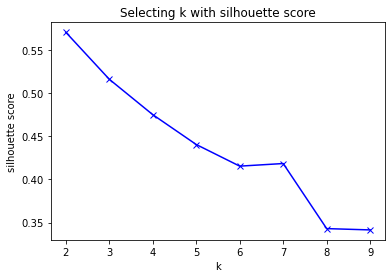

In [43]:
from sklearn.cluster import AgglomerativeClustering

# model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
# model.fit(cccd_scaled)

meanDistortions=[]

for k in range(2, 10):
    model=AgglomerativeClustering(n_clusters=k, affinity='euclidean',  linkage='average')
    model.fit(df_scaled)
    prediction=model.labels_
    meanDistortions.append(silhouette_score(df_scaled, prediction))


plt.plot(range(2, 10), meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Selecting k with silhouette score');

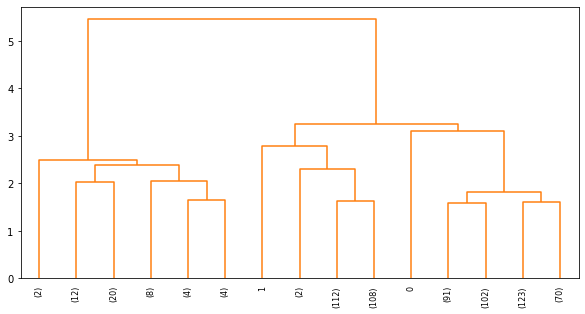

In [45]:
Z = linkage(df_scaled[cols], metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_scaled[cols]))
plt.figure(figsize=(10, 5))

dendrogram(Z, p=15, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 40, leaf_font_size=8.)
plt.show()

In [ ]:
tThis method resulted in two clusters, with one cluster containing only 8% of the total records. This division seems 
to be the users who prefer internet
transactions and those who do not. Once again, online users have more credit cards and a larger credit limit.



In [46]:
model=AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')
model.fit(df_scaled)
preds=model.labels_
df['hc_grouping'] = preds
df_scaled['hc_grouping'] = preds

df.groupby('hc_grouping').count()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping
hc_grouping,,,,,,,
0,610,610,610,610,610,610,610
1,50,50,50,50,50,50,50


In [48]:
_ = df.groupby('hc_grouping').mean().append(pd.DataFrame(df.std()).T)
_.index=['Offline','Online', 'Mean']
_

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping,hc_grouping
Offline,55012.97541,25847.540984,4.375410,2.550820,1.926230,3.788525,0.632787,NaN
Online,56708.76000,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,NaN
Mean,25627.77220,37625.487804,2.167835,1.631813,2.935724,2.865317,0.588364,0.264811


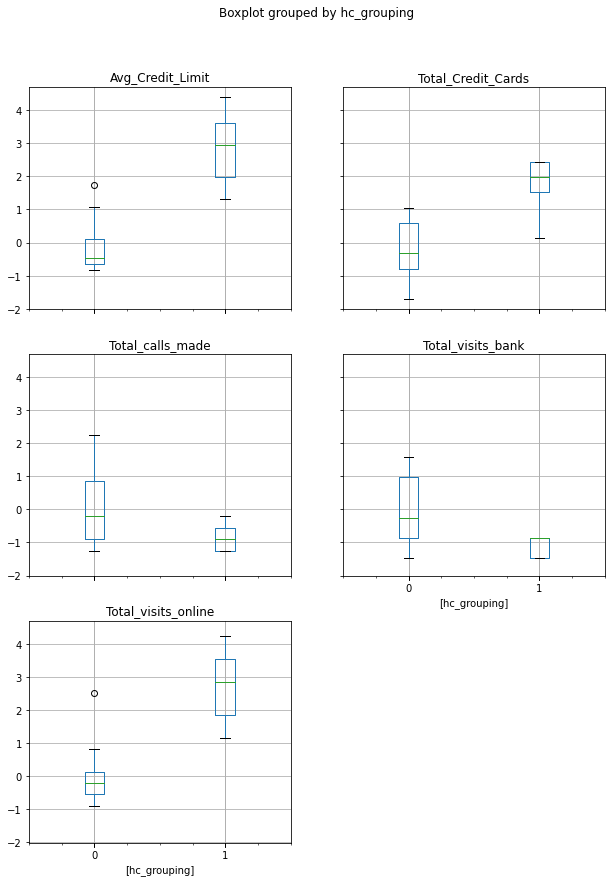

In [49]:
df_scaled.boxplot(by='hc_grouping', layout=(3,2), figsize=(10,14));

In [ ]:
5 sets of records for customers with entries that have changed over time, we can see that in three of the
five cases customers have moved from one cluster to another. Since this is the case one possible choice is to
incentivize customers to change to a more desirable class. As a possible example, we may want more customers to 
switch to digital, as they are more engaged (have more visits) and have more credit cards. Another possible option 
is to start monitoring usage that indicates a state change so that we can change contact methods accordingly for
their preferences.

In [51]:
gb_df = df.groupby('Customer Key').count()
print('There are',gb_df.loc[gb_df.Total_calls_made >=2].shape[0], 'duplicate entries for Customer Key')

for k in list(gb_df.loc[gb_df.Total_calls_made >=2].index):
    display(df.loc[df['Customer Key'] == k])

There are 5 duplicate entries for Customer Key


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping,hc_grouping
Sl_No,,,,,,,,
49,37252,6000,4,0,2,8,0,0
433,37252,59000,6,2,1,2,1,0


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping,hc_grouping
Sl_No,,,,,,,,
5,47437,100000,6,0,12,3,2,1
333,47437,17000,7,3,1,0,1,0


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping,hc_grouping
Sl_No,,,,,,,,
412,50706,44000,4,5,0,2,1,0
542,50706,60000,7,5,2,2,1,0


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping,hc_grouping
Sl_No,,,,,,,,
392,96929,13000,4,5,0,0,1,0
399,96929,67000,6,2,2,2,1,0


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping,hc_grouping
Sl_No,,,,,,,,
105,97935,17000,2,1,2,10,0,0
633,97935,187000,7,1,7,0,2,1
